In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mat
import seaborn as sns
from tabulate import tabulate

In [2]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn import tree

In [3]:
df=pd.read_csv("insurance.csv")

In [4]:
df.head()

,age,sex,bmi,classif,children,smoker,region,charges
0,19,female,27.900,PREO,0,yes,southwest,16884.92400
1,18,male,33.770,OB1,1,no,southeast,1725.55230
2,28,male,33.000,OB1,3,no,southeast,4449.46200
3,0,male,22.705,N,0,no,northwest,21984.47061
4,32,male,28.880,PREO,0,no,northwest,3866.85520


BMI	Nutritional status
Below 18.5	Underweight
18.5–24.9	Normal weight
25.0–29.9	Pre-obesity
30.0–34.9	Obesity class I
35.0–39.9	Obesity class II
Above 40	Obesity class III

In [5]:
df.dtypes

age           int64
sex          object
bmi         float64
classif      object
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [6]:
df.shape

(1338, 8)

In [7]:
df.columns

Index(['age', 'sex', 'bmi', 'classif', 'children', 'smoker', 'region',
       'charges'],
      dtype='object')

In [8]:
df.describe([0.5,0.8,0.99])

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.133782,30.663397,1.094918,13270.422265
std,14.958658,6.098187,1.205493,12110.011237
min,-58.000000,15.960000,0.000000,1121.873900
50%,39.000000,30.400000,1.000000,9382.033000
80%,53.600000,35.860000,2.000000,20260.626406
99%,64.000000,46.407900,5.000000,48537.480726
max,190.000000,53.130000,5.000000,63770.428010


In [9]:
#deleting duplicates
print('Size of dataframe before drop_duplicates', df.shape)

df.drop_duplicates(inplace= True)

print('Size of dataframe after drop_duplicates', df.shape)

Size of dataframe before drop_duplicates (1338, 8)
Size of dataframe after drop_duplicates (1337, 8)


In [10]:
df.isnull().sum()

age         0
sex         0
bmi         0
classif     8
children    0
smoker      0
region      0
charges     0
dtype: int64

In [11]:
#missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
classif,8,0.005984
age,0,0.000000
sex,0,0.000000
bmi,0,0.000000
children,0,0.000000
smoker,0,0.000000
region,0,0.000000
charges,0,0.000000


In [12]:
rows = [index for index, row in df.iterrows() if row.isnull().any()]

print(rows)

[15, 74, 128, 173, 559, 671, 839, 1331]


In [13]:
index=[15, 74, 128, 173, 559, 671, 839, 1331]

In [14]:
rows= [index for index, row in df.iterrows() if row.isnull().any()]

print(rows)

[15, 74, 128, 173, 559, 671, 839, 1331]


In [15]:
for i in rows:
    if(int(df.iloc[i]['bmi'])<18):
        df.at[i,'classif']="UW"
        
    elif(int(df.iloc[i]['bmi']) in range(18,25)):
        df.at[i,'classif']="N"
        
    elif(int(df.iloc[i]['bmi'])in range(25,30)):
        df.at[i,'classif']="PREO"
        
    elif(int(df.iloc[i]['bmi']) in range(30,35)):
        df.at[i,'classif']="OB1"
        
    elif(int(df.iloc[i]['bmi'])in range(35,40)):
        df.at[i,'classif']="OB2"
        
    elif(int(df.iloc[i]['bmi'])>40):
        df.at[i,'classif']="OB3"

In [16]:
for i in rows:
    print(df.iloc[i]['classif'])

N
PREO
UW
OB1
OB2
PREO
OB1
OB3


## Performing EDA

### Separating categorical and numerical columns

In [17]:
def separate_data_types(df):
    categorical=[]
    continuous=[]
    for column in df.columns:
        if df[column].nunique()<100:
            categorical.append(column)
        else:
            continuous.append(column)
    return categorical,continuous
categorical,continuous=separate_data_types(df)
from tabulate import tabulate
table=[categorical,continuous]
print(tabulate({"categorical":categorical,
                "continuous":continuous},headers=["categorical","continuous"]))

categorical.remove('age')
continuous.append('age')

print("continuous:-",continuous)
print("categorical:-",categorical)

categorical    continuous
-------------  ------------
age            bmi
sex            charges
classif
children
smoker
region
continuous:- ['bmi', 'charges', 'age']
categorical:- ['sex', 'classif', 'children', 'smoker', 'region']


In [18]:
def myOutliers(df,col):
    Q3=np.quantile(df[col],0.75)
    Q1=np.quantile(df[col],0.25)
    
    IQR=Q3-Q1
    
    global mylist
    global my_outlier_df
    
    lower_range=Q1-1.5*IQR
    upper_range=Q3+1.5*IQR
    
    print("The lower range of",col,"is",lower_range)
    print("The upper range of",col,"is",upper_range)
    
    mylist=[x for x in df[col] if ((x<lower_range) | (x>upper_range))]
    print("total outlier in",col,"are",len(mylist))
    my_outlier_df=df.loc[df[col].isin(mylist)]
k=['age','bmi','children','charges']

In [19]:
for i in k:
    print('i is',i)
    myOutliers(df,i)
    print('*****************')

i is age
The lower range of age is -11.5
The upper range of age is 88.5
total outlier in age are 2
*****************
i is bmi
The lower range of bmi is 13.674999999999994
The upper range of bmi is 47.31500000000001
total outlier in bmi are 9
*****************
i is children
The lower range of children is -3.0
The upper range of children is 5.0
total outlier in children are 0
*****************
i is charges
The lower range of charges is -13120.716174999998
The upper range of charges is 34524.777625
total outlier in charges are 139
*****************


In [20]:
df=df[(df['age']<=88.5)&(df['age']>=-11.5)]
df=df[(df['bmi']<=47.315)&(df['bmi']>=13.674)]
df.shape  

(1327, 8)

### Univariate Analysis

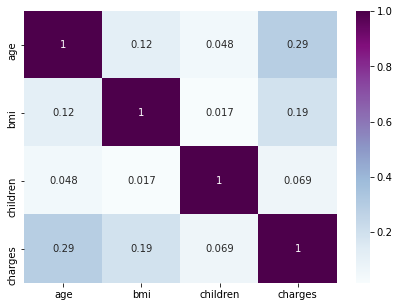

In [21]:
fig,ax=plt.subplots(figsize=(7,5))
sns.heatmap(df.corr(),annot=True,cmap="BuPu")
plt.show()

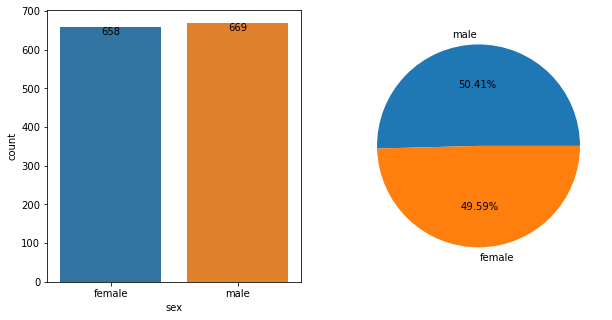

In [22]:
fig, ax=plt.subplots(1, 2, figsize=(10, 5))  
percentage=df["sex"].value_counts() 
labels =list(df["sex"].value_counts().index)  
sns.countplot (x=df["sex"], ax=ax [0])
plt.pie (percentage, labels=labels, autopct="%0.2f%%") 
for bar in ax[0].patches: 
    count = f"{round((bar.get_height()), 2)}" 
    x = bar.get_x() +bar.get_width() /2 
    y=bar.get_height() 
    ax[0].annotate (count, (x, y), ha = "center", va = "top")
plt.show()

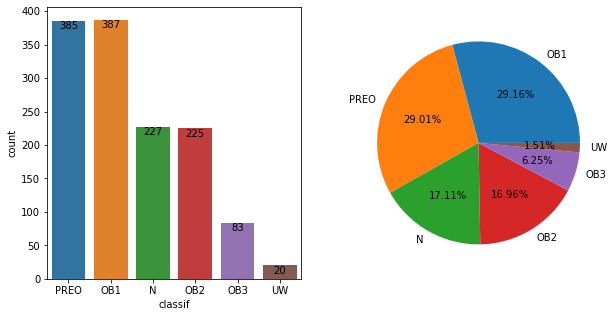

In [23]:
fig, ax=plt.subplots(1, 2, figsize=(10, 5))
percentage=df["classif"].value_counts() 
labels =list(df["classif"].value_counts().index)  
sns.countplot (x=df["classif"], ax=ax [0])
plt.pie (percentage, labels=labels, autopct="%0.2f%%") 
for bar in ax[0].patches: 
    count = f"{round((bar.get_height()), 2)}" 
    x = bar.get_x() +bar.get_width() /2 
    y=bar.get_height() 
    ax[0].annotate (count, (x, y), ha = "center", va = "top")
plt.show()

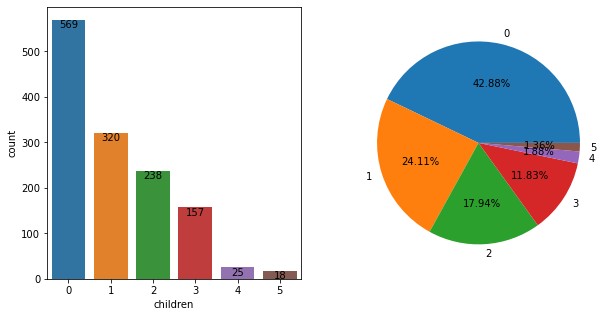

In [24]:
fig, ax=plt.subplots(1, 2, figsize=(10, 5)) 
percentage=df["children"].value_counts() 
labels =list(df["children"].value_counts().index)  
sns.countplot (x=df["children"], ax=ax [0])
plt.pie (percentage, labels=labels, autopct="%0.2f%%") 
for bar in ax[0].patches: 
    count = f"{round((bar.get_height()), 2)}" 
    x = bar.get_x() +bar.get_width() /2 
    y=bar.get_height() 
    ax[0].annotate (count, (x, y), ha = "center", va = "top")
plt.show()

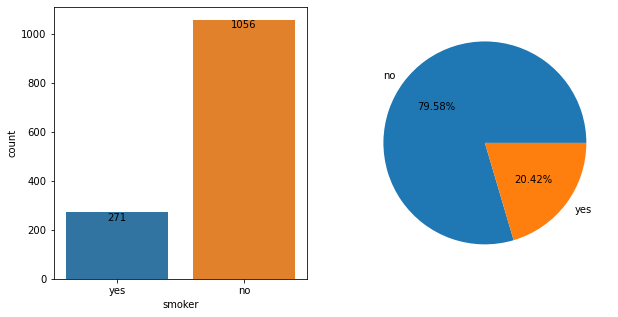

In [25]:
fig, ax=plt.subplots(1, 2, figsize=(10, 5))  
percentage=df["smoker"].value_counts() 
labels =list(df["smoker"].value_counts().index)  
sns.countplot (x=df["smoker"], ax=ax [0])
plt.pie (percentage, labels=labels, autopct="%0.2f%%") 
for bar in ax[0].patches: 
    count = f"{round((bar.get_height()), 2)}" 
    x = bar.get_x() +bar.get_width() /2 
    y=bar.get_height() 
    ax[0].annotate (count, (x, y), ha = "center", va = "top")
plt.show()

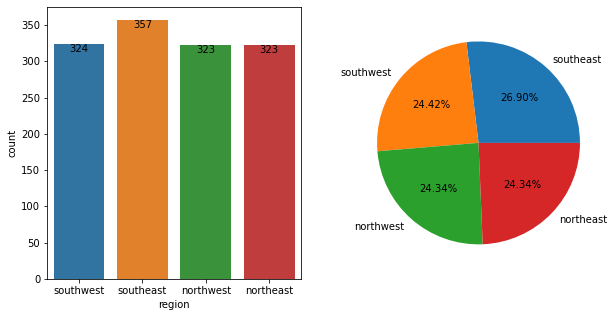

In [26]:
fig, ax=plt.subplots(1, 2, figsize=(10, 5))  
percentage=df["region"].value_counts() 
labels =list(df["region"].value_counts().index)  
sns.countplot (x=df["region"], ax=ax [0])
plt.pie (percentage, labels=labels, autopct="%0.2f%%") 
for bar in ax[0].patches: 
    count = f"{round((bar.get_height()), 2)}" 
    x = bar.get_x() +bar.get_width() /2 
    y=bar.get_height() 
    ax[0].annotate (count, (x, y), ha = "center", va = "top")
plt.show()

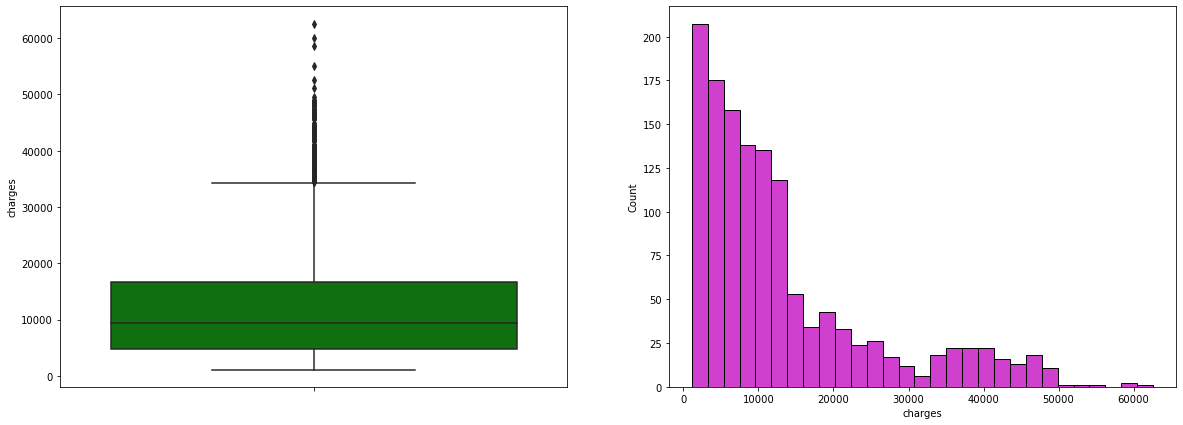

In [27]:
fig,ax=plt.subplots(1,2,figsize=(20,7))
sns.histplot(x=df["charges"],ax=ax[1],color='m')
sns.boxplot(y=df['charges'],ax=ax[0],color='g')
plt.show()

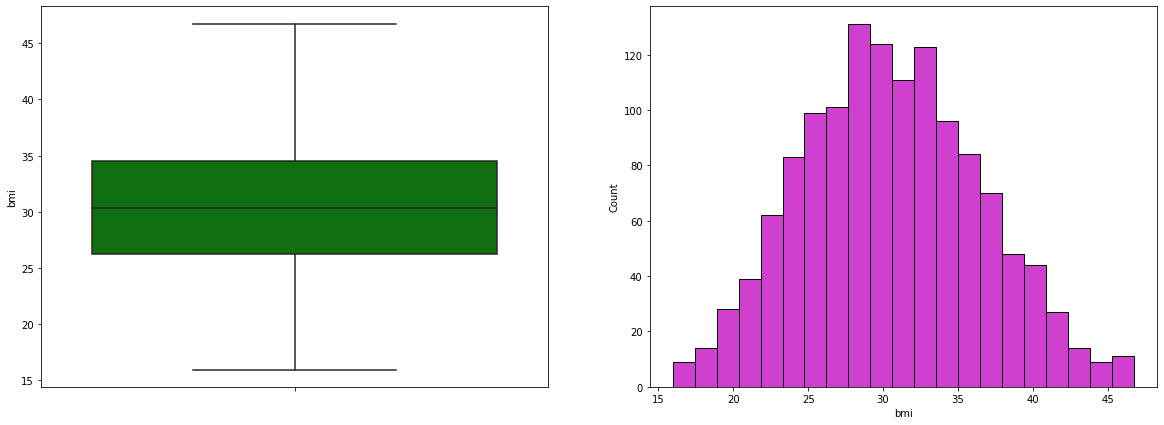

In [28]:
fig,ax=plt.subplots(1,2,figsize=(20,7))
sns.histplot(x=df["bmi"],ax=ax[1],color='m')
sns.boxplot(y=df['bmi'],ax=ax[0],color='g')
plt.show()

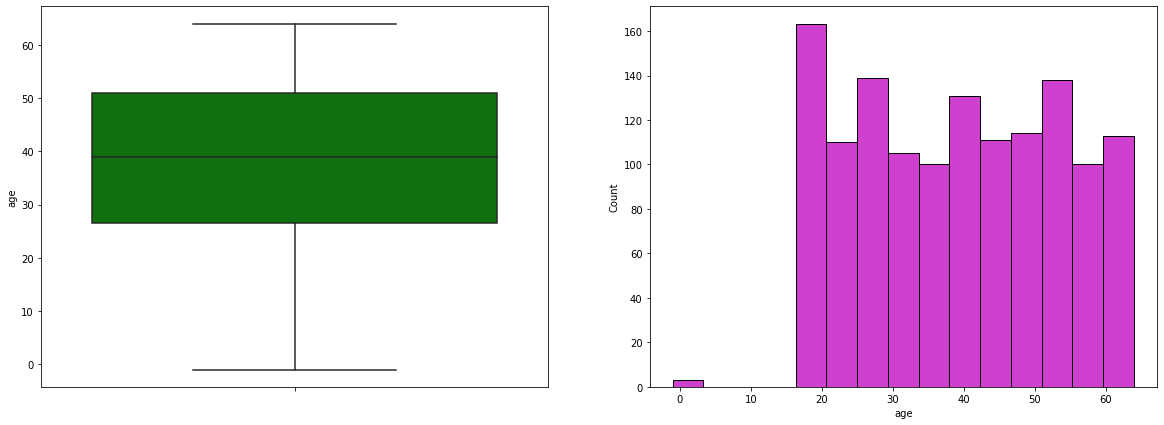

In [29]:
fig,ax=plt.subplots(1,2,figsize=(20,7))
sns.histplot(x=df["age"],ax=ax[1],color='m')
sns.boxplot(y=df['age'],ax=ax[0],color='g')
plt.show()

#### interpretaion 1: around 60 % popluation  having BMI between 25-35 which means they are not normal and falls under the category of pre-obesity and obesity 1 type
#### interpretation 2:around 43 %  population have no children and 24 % have 1 child.
#### interpretaton 3: density are equally distributed among all the regions.

### Bivariate

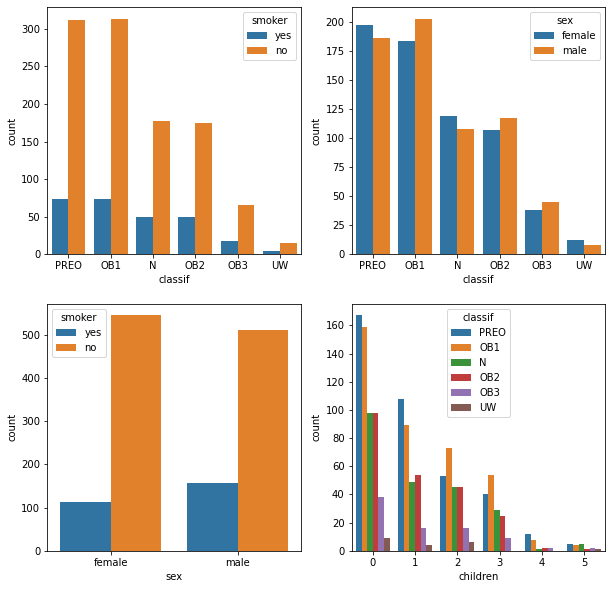

In [30]:
fig,ax=plt.subplots(2,2,figsize=(10,10))
sns.countplot(x='classif',hue='smoker',data=df,ax=ax[0,0])
ax[0,0].set_title('')
sns.countplot(x='classif',hue='sex',data=df,ax=ax[0,1])
ax[0,1].set_title('')
sns.countplot(x='sex',hue='smoker',data=df,ax=ax[1,0])
ax[1,0].set_title('')
sns.countplot(x='children',hue='classif',data=df,ax=ax[1,1])
ax[1,1].set_title('')
plt.show()   

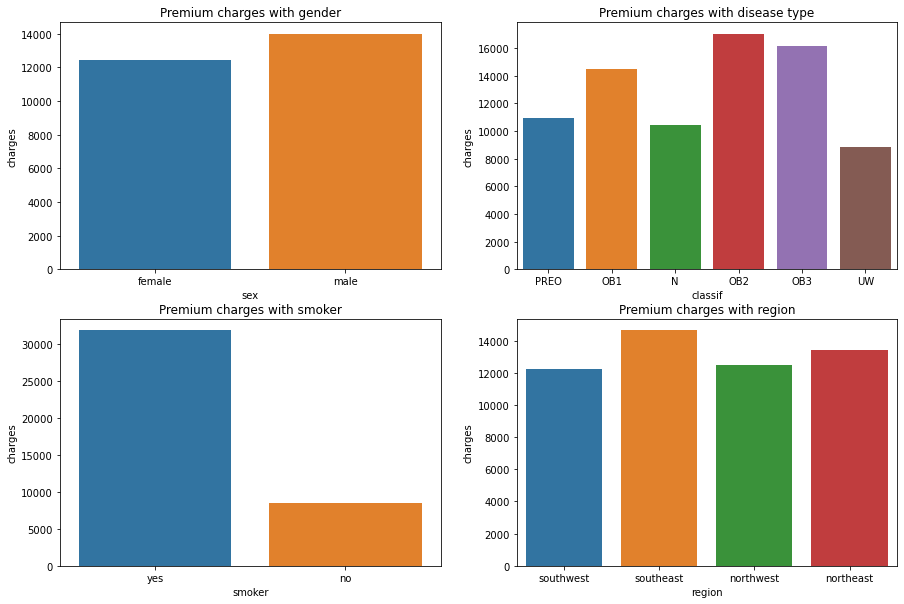

In [31]:
fig,ax = plt.subplots( 2,2,figsize=(15,10))
ax[0,0].set_title('Premium charges with gender')
ax[0,1].set_title('Premium charges with disease type')
ax[1,0].set_title('Premium charges with smoker')
ax[1,1].set_title('Premium charges with region')

sns.barplot(y=df['charges'], x=df['sex'],ci=None,ax=ax[0,0])
sns.barplot(y=df['charges'], x=df['classif'],ci=None,ax=ax[0,1])
sns.barplot(y=df['charges'], x=df['smoker'],ci=None,ax=ax[1,0])
sns.barplot(y=df['charges'], x=df['region'],ci=None,ax=ax[1,1])
plt.show()

#### iterpretation 1: smoker are more likely to fall ill that's  the another reason of high premium rates

### Multivariate

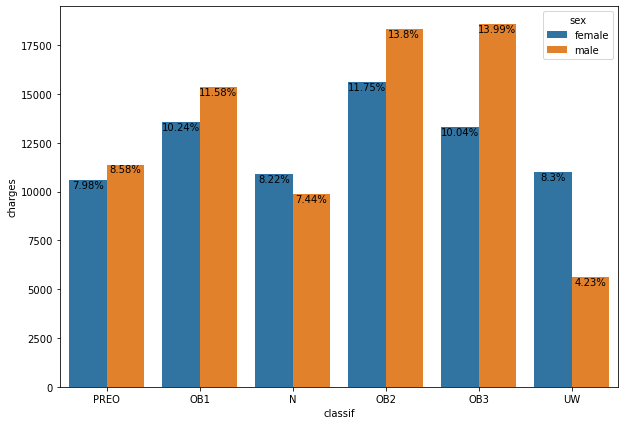

In [32]:
fig,ax= plt.subplots(figsize=(10,7))
#sns.barplot(x='rent amount (R$)',hue='city',data=df1)
sns.barplot(x=df['classif'],y=df['charges'],hue=df['sex'],ci=None,ax=ax)
count=len(df['classif'])

for bar in ax.patches:
    percentage = f'{round((bar.get_height()/count),2)}%'
    
    x=bar.get_x()+bar.get_width()/2
    y=bar.get_height()
    ax.annotate(percentage,(x,y),ha='center',va='top')
    
plt.show()

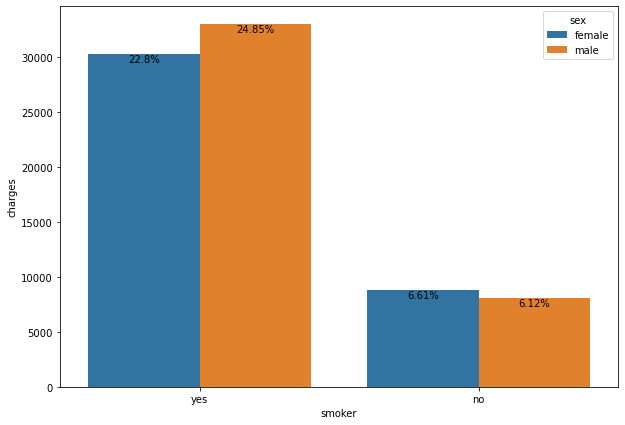

In [33]:
fig,ax= plt.subplots(figsize=(10,7))
#sns.barplot(x='rent amount (R$)',hue='city',data=df1)
sns.barplot(x=df['smoker'],y=df['charges'],hue=df['sex'],ci=None,ax=ax)
count=len(df['smoker'])

for bar in ax.patches:
    percentage = f'{round((bar.get_height()/count),2)}%'
    
    x=bar.get_x()+bar.get_width()/2
    y=bar.get_height()
    ax.annotate(percentage,(x,y),ha='center',va='top')
    
plt.show()

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


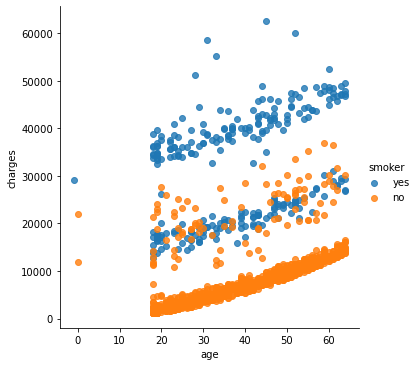

In [34]:
sns.lmplot("age", "charges", df, hue="smoker", fit_reg=False);

#### interpretation 1: as age increase we can see that it directly impacts the  premium charges and also we can observe that smoker are paying high premium compare to no smoker
#### interpretation 2:OB2 and OB3 types are having high premium rates as chances of getting stroke in these categories are quit high.Obesity increases the risk of several debilitating, and deadly diseases, including diabetes, heart disease, and some cancers.

### Creating Dummies

In [35]:
sex = pd.get_dummies(df.sex, prefix= 'sex')
smoker=pd.get_dummies(df.smoker, prefix= 'smoker')
classif=pd.get_dummies(df.classif, prefix= 'classif')
df_with_dummies=  pd.concat([df,sex,smoker,classif],axis='columns')
df_with_dummies

,age,sex,bmi,classif,children,smoker,region,charges,sex_female,sex_male,smoker_no,smoker_yes,classif_N,classif_OB1,classif_OB2,classif_OB3,classif_PREO,classif_UW
0,19,female,27.900,PREO,0,yes,southwest,16884.92400,1,0,0,1,0,0,0,0,1,0
1,18,male,33.770,OB1,1,no,southeast,1725.55230,0,1,1,0,0,1,0,0,0,0
2,28,male,33.000,OB1,3,no,southeast,4449.46200,0,1,1,0,0,1,0,0,0,0
3,0,male,22.705,N,0,no,northwest,21984.47061,0,1,1,0,1,0,0,0,0,0
4,32,male,28.880,PREO,0,no,northwest,3866.85520,0,1,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,OB1,3,no,northwest,10600.54830,0,1,1,0,0,1,0,0,0,0
1334,18,female,31.920,OB1,0,no,northeast,2205.98080,1,0,1,0,0,1,0,0,0,0
1335,18,female,36.850,OB2,0,no,southeast,1629.83350,1,0,1,0,0,0,1,0,0,0
1336,21,female,25.800,PREO,0,no,southwest,2007.94500,1,0,1,0,0,0,0,0,1,0


In [36]:
df_with_dummies=df_with_dummies.drop(['sex', 'smoker','classif','region','charges'], axis = 1)

In [37]:
df_with_dummies.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,classif_N,classif_OB1,classif_OB2,classif_OB3,classif_PREO,classif_UW
0,19,27.900,0,1,0,0,1,0,0,0,0,1,0
1,18,33.770,1,0,1,1,0,0,1,0,0,0,0
2,28,33.000,3,0,1,1,0,0,1,0,0,0,0
3,0,22.705,0,0,1,1,0,1,0,0,0,0,0
4,32,28.880,0,0,1,1,0,0,0,0,0,1,0


In [38]:
#normalization

In [39]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

scale_columns = ["age","bmi",'charges']
scale_columns1 = ["age","bmi"]
df[scale_columns] = std_scaler.fit_transform(df[scale_columns])
df_with_dummies[scale_columns1] = std_scaler.fit_transform(df_with_dummies[scale_columns1])
df.head()
df_with_dummies.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,classif_N,classif_OB1,classif_OB2,classif_OB3,classif_PREO,classif_UW
0,-1.423526,-0.445333,0,1,0,0,1,0,0,0,0,1,0
1,-1.494281,0.545857,1,0,1,1,0,0,1,0,0,0,0
2,-0.786730,0.415837,3,0,1,1,0,0,1,0,0,0,0
3,-2.767872,-1.322544,0,0,1,1,0,1,0,0,0,0,0
4,-0.503710,-0.279853,0,0,1,1,0,0,0,0,0,1,0


In [40]:
y=df['charges']

### feature selection

In [41]:
for columns in df_with_dummies.columns:
    x=df_with_dummies[[columns]]
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1) 
    model=LinearRegression()
    model.fit(x_train,y_train)
    y_test_predicted=model.predict(x_test)
    print("MSE =",mean_squared_error(y_test_predicted,y_test))
    # predicting the accuracy score
    score=r2_score(y_test,y_test_predicted)
    print("r2 score is ",score)
    print("test_size={},random_state={}".format(0.2,1))
    print(columns)
    print("-"*50)

MSE = 0.9010941686775242
r2 score is  0.09197274630642904
test_size=0.2,random_state=1
age
--------------------------------------------------
MSE = 0.953535329748683
r2 score is  0.03912809907290815
test_size=0.2,random_state=1
bmi
--------------------------------------------------
MSE = 0.9816829020294728
r2 score is  0.01076395729427726
test_size=0.2,random_state=1
children
--------------------------------------------------
MSE = 0.9943524243863513
r2 score is  -0.0020030453023656136
test_size=0.2,random_state=1
sex_female
--------------------------------------------------
MSE = 0.9943524243863513
r2 score is  -0.0020030453023656136
test_size=0.2,random_state=1
sex_male
--------------------------------------------------
MSE = 0.3537149011711074
r2 score is  0.6435635902823874
test_size=0.2,random_state=1
smoker_no
--------------------------------------------------
MSE = 0.3537149011711074
r2 score is  0.6435635902823874
test_size=0.2,random_state=1
smoker_yes
------------------------

In [42]:
for columns in df_with_dummies.columns:
    x=df_with_dummies[['smoker_no','smoker_yes',columns]]
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1) 
    model=LinearRegression()
    model.fit(x_train,y_train)
    y_test_predicted=model.predict(x_test)
    print("MSE =",mean_squared_error(y_test_predicted,y_test))
    # predicting the accuracy score
    score=r2_score(y_test,y_test_predicted)
    print("r2 score is ",score)
    print("test_size={},random_state={}".format(0.2,1))
    print("'smoker_no','smoker_yes'",columns)
    print("-"*50)

MSE = 0.24594244724310538
r2 score is  0.752165253422305
test_size=0.2,random_state=1
'smoker_no','smoker_yes' age
--------------------------------------------------
MSE = 0.30478850919738554
r2 score is  0.692866425525718
test_size=0.2,random_state=1
'smoker_no','smoker_yes' bmi
--------------------------------------------------
MSE = 0.3524296394211189
r2 score is  0.6448587409311063
test_size=0.2,random_state=1
'smoker_no','smoker_yes' children
--------------------------------------------------
MSE = 0.35374109304301476
r2 score is  0.6435371968882853
test_size=0.2,random_state=1
'smoker_no','smoker_yes' sex_female
--------------------------------------------------
MSE = 0.35374109304301476
r2 score is  0.6435371968882853
test_size=0.2,random_state=1
'smoker_no','smoker_yes' sex_male
--------------------------------------------------
MSE = 0.35371490117110743
r2 score is  0.6435635902823873
test_size=0.2,random_state=1
'smoker_no','smoker_yes' smoker_no
-----------------------------

In [43]:
for columns in df_with_dummies.columns:
    x=df_with_dummies[['smoker_no','smoker_yes','age',columns]]
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1) 
    model=LinearRegression()
    model.fit(x_train,y_train)
    y_test_predicted=model.predict(x_test)
    print("MSE =",mean_squared_error(y_test_predicted,y_test))
    # predicting the accuracy score
    score=r2_score(y_test,y_test_predicted)
    print("r2 score is ",score)
    print("test_size={},random_state={}".format(0.2,1))
    print("'smoker_no','smoker_yes','age'",columns)
    print("-"*50)

MSE = 0.24594244724310538
r2 score is  0.752165253422305
test_size=0.2,random_state=1
'smoker_no','smoker_yes','age' age
--------------------------------------------------
MSE = 0.21833133292263282
r2 score is  0.7799888096934924
test_size=0.2,random_state=1
'smoker_no','smoker_yes','age' bmi
--------------------------------------------------
MSE = 0.2469955031885957
r2 score is  0.7511040951866762
test_size=0.2,random_state=1
'smoker_no','smoker_yes','age' children
--------------------------------------------------
MSE = 0.2458337691858702
r2 score is  0.7522747676565308
test_size=0.2,random_state=1
'smoker_no','smoker_yes','age' sex_female
--------------------------------------------------
MSE = 0.2458337691858702
r2 score is  0.7522747676565308
test_size=0.2,random_state=1
'smoker_no','smoker_yes','age' sex_male
--------------------------------------------------
MSE = 0.24594244724310538
r2 score is  0.752165253422305
test_size=0.2,random_state=1
'smoker_no','smoker_yes','age' smoke

In [44]:
for columns in df_with_dummies.columns:
    x=df_with_dummies[['smoker_no','smoker_yes','age','bmi',columns]]
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1) 
    model=LinearRegression()
    model.fit(x_train,y_train)
    y_test_predicted=model.predict(x_test)
    print("MSE =",mean_squared_error(y_test_predicted,y_test))
    # predicting the accuracy score
    score=r2_score(y_test,y_test_predicted)
    print("r2 score is ",score)
    print("test_size={},random_state={}".format(0.2,1))
    print("'smoker_no','smoker_yes','age','bmi'",columns)
    print("-"*50)

MSE = 0.2183313329226328
r2 score is  0.7799888096934925
test_size=0.2,random_state=1
'smoker_no','smoker_yes','age','bmi' age
--------------------------------------------------
MSE = 0.21833133292263288
r2 score is  0.7799888096934924
test_size=0.2,random_state=1
'smoker_no','smoker_yes','age','bmi' bmi
--------------------------------------------------
MSE = 0.21872912790509771
r2 score is  0.7795879540470834
test_size=0.2,random_state=1
'smoker_no','smoker_yes','age','bmi' children
--------------------------------------------------
MSE = 0.2183367889714797
r2 score is  0.7799833116654031
test_size=0.2,random_state=1
'smoker_no','smoker_yes','age','bmi' sex_female
--------------------------------------------------
MSE = 0.2183367889714797
r2 score is  0.7799833116654031
test_size=0.2,random_state=1
'smoker_no','smoker_yes','age','bmi' sex_male
--------------------------------------------------
MSE = 0.2183313329226328
r2 score is  0.7799888096934925
test_size=0.2,random_state=1
'smok

In [45]:
for columns in df_with_dummies.columns:
    x=df_with_dummies[['smoker_no','smoker_yes','age','bmi', 'classif_N', 'classif_OB1', 'classif_OB2',
       'classif_OB3', 'classif_PREO', 'classif_UW',columns]]
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1) 
    model=LinearRegression()
    model.fit(x_train,y_train)
    y_test_predicted=model.predict(x_test)
    print("MSE =",mean_squared_error(y_test_predicted,y_test))
    # predicting the accuracy score
    score=r2_score(y_test,y_test_predicted)
    print("r2 score is ",score)
    print("test_size={},random_state={}".format(0.2,1))
    print("'smoker_no','smoker_yes','age','bmi'",columns)
    print("-"*50)

MSE = 0.2153063316898754
r2 score is  0.7830370855089177
test_size=0.2,random_state=1
'smoker_no','smoker_yes','age','bmi' age
--------------------------------------------------
MSE = 0.21530633168987534
r2 score is  0.7830370855089177
test_size=0.2,random_state=1
'smoker_no','smoker_yes','age','bmi' bmi
--------------------------------------------------
MSE = 0.21522879566061903
r2 score is  0.7831152181061036
test_size=0.2,random_state=1
'smoker_no','smoker_yes','age','bmi' children
--------------------------------------------------
MSE = 0.2153867551083083
r2 score is  0.7829560433067697
test_size=0.2,random_state=1
'smoker_no','smoker_yes','age','bmi' sex_female
--------------------------------------------------
MSE = 0.2153867551083083
r2 score is  0.7829560433067697
test_size=0.2,random_state=1
'smoker_no','smoker_yes','age','bmi' sex_male
--------------------------------------------------
MSE = 0.21530633168987542
r2 score is  0.7830370855089176
test_size=0.2,random_state=1
'smo

finally we can conclude that ['smoker_no','smoker_yes','age','bmi','classif_N','classif_OB1','classif_OB2','classif_OB3','classif_PREO', 'classif_UW'] this columns are useful and we can give this as a input to our mode

In [46]:
#independent_data.head()

In [47]:
#segregatig the data
independent_data=df_with_dummies[['smoker_no','smoker_yes','age','bmi', 'classif_N', 'classif_OB1', 
                                                'classif_OB2','classif_OB3', 'classif_PREO', 'classif_UW']]
dependent_data=df.charges

In [48]:
L_1=[0.15,0.20,0.25,0.30,0.35]
L_2=[0,1,2,3,4]

for i in L_1:
    for j in L_2:
        
        # spliting the data
        Independent_train,Independent_test,Dependent_train,Dependent_test=train_test_split(independent_data,dependent_data,test_size=i,random_state=j)
         
        theModel=LinearRegression()
        theModel.fit(Independent_train,Dependent_train)
        dependent_test_Prediction=theModel.predict(Independent_test)
        print("MSE =",mean_squared_error(dependent_test_Prediction,Dependent_test))
        # predicting the accuracy score
        score=r2_score(Dependent_test,dependent_test_Prediction)
        print("r2 score is ",score)
        print("test size={},random_state={}".format(i,j))
        print(".................")

MSE = 0.31786933957090313
r2 score is  0.6909902855836636
test size=0.15,random_state=0
.................
MSE = 0.21579405626570028
r2 score is  0.769555023366655
test size=0.15,random_state=1
.................
MSE = 0.21358309934026182
r2 score is  0.7712122788497329
test size=0.15,random_state=2
.................
MSE = 0.28259876921817884
r2 score is  0.736905888642346
test size=0.15,random_state=3
.................
MSE = 0.2684811287698654
r2 score is  0.7453107656573204
test size=0.15,random_state=4
.................
MSE = 0.3012044365694959
r2 score is  0.7369622799889153
test size=0.2,random_state=0
.................
MSE = 0.21530633168987537
r2 score is  0.7830370855089177
test size=0.2,random_state=1
.................
MSE = 0.23216695496008727
r2 score is  0.7637952546771316
test size=0.2,random_state=2
.................
MSE = 0.27166191912731
r2 score is  0.74223272322739
test size=0.2,random_state=3
.................
MSE = 0.2525489141872219
r2 score is  0.762988055426534
tes

In [49]:
# spliting the data
Independent_train,Independent_test,Dependent_train,Dependent_test=train_test_split(independent_data,dependent_data,test_size=0.2,random_state=1)

In [50]:
#building the model
theModel=LinearRegression()
theModel.fit(Independent_train,Dependent_train)

LinearRegression()

In [51]:
dependent_test_Prediction=theModel.predict(Independent_test)
print("MSE of the test data:",mean_squared_error(dependent_test_Prediction,Dependent_test))
print("R-square of the test data:",theModel.score(Independent_test,Dependent_test))

MSE of the test data: 0.21530633168987537
R-square of the test data: 0.7830370855089177


In [52]:
mse_LR=mean_squared_error(dependent_test_Prediction,Dependent_test)
r2_LR=theModel.score(Independent_test,Dependent_test)

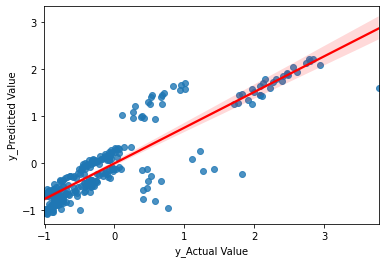

In [53]:
sns.regplot(x=Dependent_test,y=dependent_test_Prediction, line_kws={"color": "red"})
plt.xlabel("y_Actual Value")
plt.ylabel("y_Predicted Value")
plt.show()

In [54]:
import statsmodels.api as sm
model = sm.OLS(dependent_data,independent_data).fit()
model.summary()  

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     490.9
Date:                Tue, 10 May 2022   Prob (F-statistic):               0.00
Time:                        12:38:16   Log-Likelihood:                -966.53
No. Observations:                1327   AIC:                             1951.
Df Residuals:                    1318   BIC:                             1998.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
smoker_no       -0.5645      0.020    -27.791      0.000      -0.604      -0.525
smoker_yes       1.4064      0.030     46.372      0.000       1.347       1.466
age              0.2963      0.014     21.264      0.000       0.269       0.324
bmi              0.0233      0.054      0.429      0.668      -0.083       0.130
classif_N       -0.0235      0.076     -0.309      0.758      -0.173       0.126
classif_OB1      0.2791      0.035      7.972      0.000       0.210       0.348
classif_OB2      0.3578      0.073      4.890      0.000       0.214       0.501
classif_OB3      0.3071      0.123      2.499      0.013       0.066       0.548
classif_PREO     0.0216      0.036      0.596      0.551      -0.050       0.093
classif_UW      -0.1003      0.151     -0.662      0.508      -0.397       0.197
==============================================================================
Omnibus:                      325.482   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              808.803
Skew:                           1.304   Prob(JB):                    2.35e-176
Kurtosis:                       5.797   Cond. No.                     3.19e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.59e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

interpretation 1:we can see that R2 is 0.74 which is quit good 
interpretation 2: we can see that AIC BIC is also low
interperation 3: P value is also low  for children and age which is 0.001 
interpreation 4 :MSe value is 0.264    

finallly we can say that this model is acceptable or good to go.

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from numpy import mean
from numpy import absolute
from numpy import sqrt

In [56]:
#define cross-validation method to use
cv = KFold(n_splits=5, random_state=1, shuffle=True) 

#build multiple linear regression model
model = LinearRegression()

#use LOOCV to evaluate model
scores = cross_val_score(model, Independent_train, Dependent_train, scoring='neg_mean_squared_error',
                         cv=cv, n_jobs=-1)

#view RMSE
sqrt(mean(absolute(scores)))

0.5134589128322433

###  ridge regression

In [57]:
from sklearn.linear_model import Ridge

In [58]:
myRidge=Ridge(alpha=1).fit(Independent_train,Dependent_train)

In [59]:
prediction1=myRidge.predict(Independent_test)

In [60]:
mse_ridge=mean_squared_error(Dependent_test,prediction1)
r2_ridge=myRidge.score(Independent_test,Dependent_test)

In [61]:
print("R-square of the entire data:",myRidge.score(Independent_test,Dependent_test))

R-square of the entire data: 0.7828278925048094


In [62]:
mean_absolute_error(Dependent_test,prediction1)

0.327919451317369

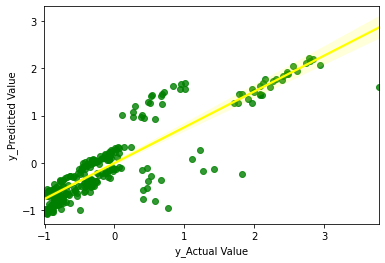

In [63]:
sns.regplot(x=Dependent_test,y=dependent_test_Prediction,scatter_kws={"color": "green"}, line_kws={"color": "yellow"})
plt.xlabel("y_Actual Value")
plt.ylabel("y_Predicted Value")
plt.show()

## Lasso

In [64]:
from sklearn.linear_model import Lasso

In [65]:
myLasso=Lasso(alpha=0.01).fit(Independent_train,Dependent_train)

In [66]:
prediction2=myLasso.predict(Independent_test)

In [67]:
mse_lasso=mean_squared_error(Dependent_test,prediction2)
r2_lasso=myLasso.score(Independent_test,Dependent_test)

In [68]:
mean_absolute_error(Dependent_test,prediction2)

0.3295382628851165

In [69]:
print("R-square of the entire data:",myLasso.score(Independent_test,Dependent_test))

R-square of the entire data: 0.7777704934354602


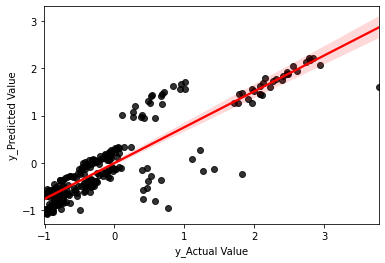

In [70]:
sns.regplot(x=Dependent_test,y=dependent_test_Prediction,
            scatter_kws={"color": "black"}, line_kws={"color": "red"})
plt.xlabel("y_Actual Value")
plt.ylabel("y_Predicted Value")
plt.show()

### Decision Tree Regresser

In [71]:
dtm = DecisionTreeRegressor(max_depth=4,min_samples_split=5,max_leaf_nodes=10)
dtm.fit(Independent_train,Dependent_train)

DecisionTreeRegressor(max_depth=4, max_leaf_nodes=10, min_samples_split=5)

In [72]:
#dtm.fit(Independent_test,Dependent_test)

In [73]:
#Predict the response for test dataset
y_pred = dtm.predict(Independent_test)

In [74]:
print("R-Squared on test dataset={}".format(dtm.score(Independent_test,Dependent_test)))

R-Squared on test dataset=0.8488186737361937


In [75]:
print("R-Squared on train dataset={}".format(dtm.score(Independent_train,Dependent_train)))

R-Squared on train dataset=0.8548598449140389


In [76]:
mse_DT = mean_absolute_error(Dependent_test, y_pred)

In [77]:
r2_DT=dtm.score(Independent_test,Dependent_test)

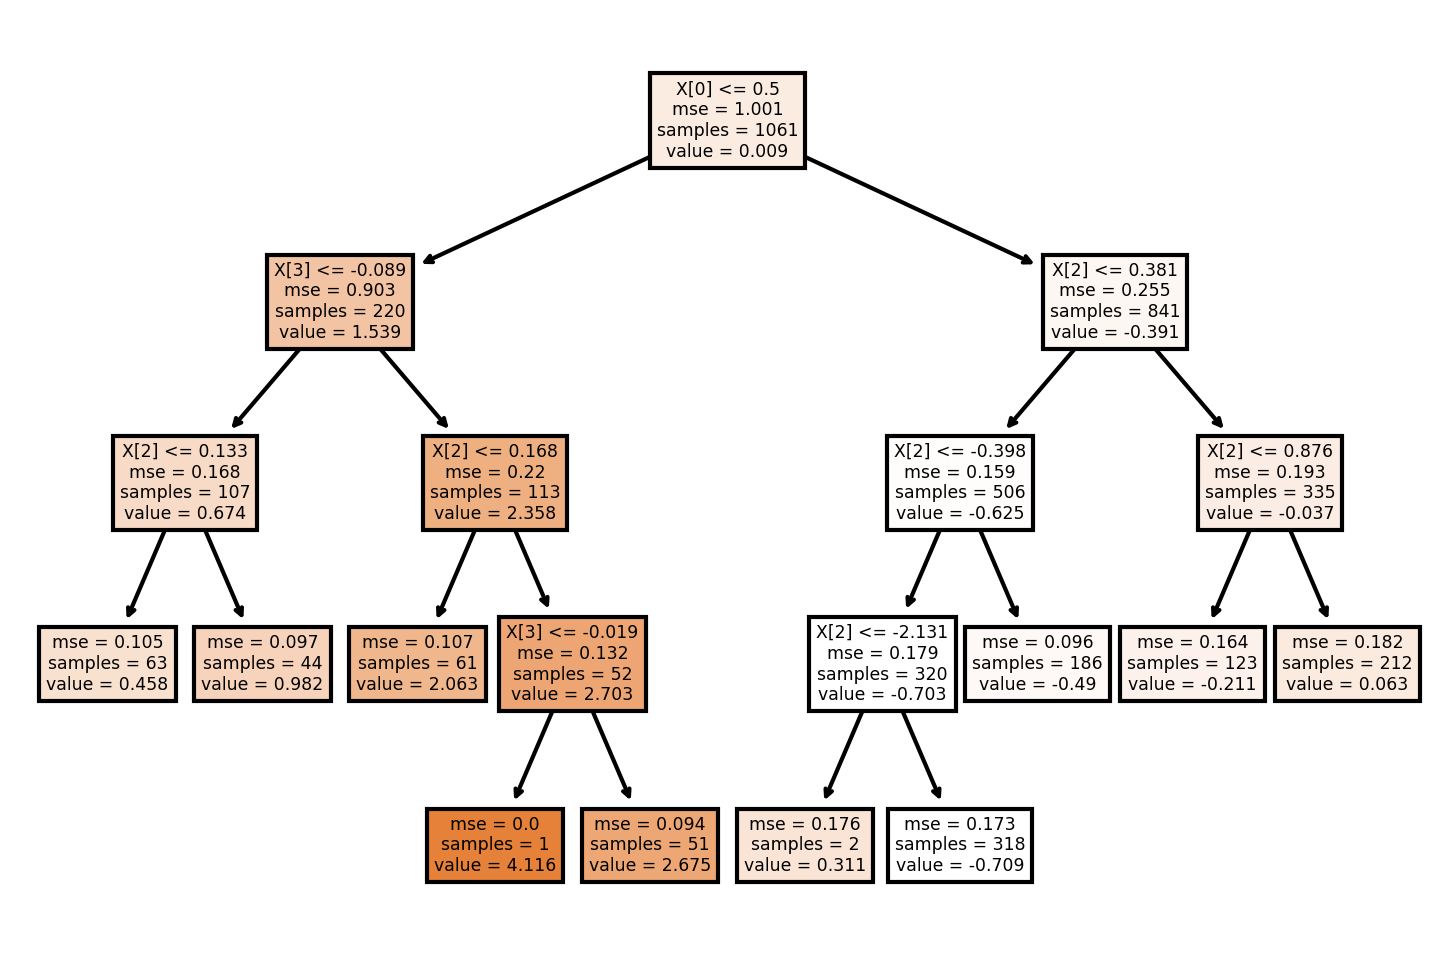

In [78]:
# Setting dpi = 300 to make image clearer than default
fig, axes = plt.subplots(dpi=300)

tree.plot_tree(dtm,
           filled = True);

#save figure in current directory as png
fig.savefig('regression_decisiontree.png')

### Random Forest

In [79]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
model.fit(Independent_train,Dependent_train)
y_pred=model.predict(Independent_test)
y_pred



# predicting the accuracy score
score=r2_score(Dependent_test,y_pred)
print("r2 socre is ",score)

r2 socre is  0.8290836909713923


In [80]:
mse_RF=mean_squared_error(Dependent_test,y_pred)
r2_RF=model.score(Independent_test,Dependent_test)

In [81]:
series_pred = pd.Series(y_pred)
df4 = pd.DataFrame(data=series_pred, columns=['prediction'])
df5 = pd.merge(df4, Dependent_test, left_index=True, right_index=True)
df5.head()

,prediction,charges
6,-0.679681,-0.415954
8,-0.765261,-0.568883
12,-0.592960,-0.950714
19,-0.053971,1.968375
27,-0.902402,-0.080107


### KNeighborsRegressor

In [82]:
from sklearn.neighbors import KNeighborsRegressor
list1=[]
list2=[]
for i in np.arange(1,21,1):
    thismodel1 = KNeighborsRegressor(n_neighbors=i)
    thismodel1.fit(Independent_train,Dependent_train)
    Y_pred = thismodel1.predict(Independent_test)
    acc_log = round(thismodel1.score(Independent_train,Dependent_train) * 100, 2)
    list1.append(i)
    list2.append(acc_log)
    

In [83]:
accuracy=pd.DataFrame(list(zip(list1,list2)),columns=['k-value','R-squared'])
accuracy

,k-value,R-squared
0,1,99.30
1,2,92.36
2,3,89.59
3,4,88.67
4,5,87.92
5,6,87.59
6,7,87.25
7,8,86.81
8,9,86.65
9,10,86.32


#### since for k value =1 we are getting very low bias   so it case of overfitting  so we  can choose  k values as 3 or 5

In [84]:
thismodel1 = KNeighborsRegressor(n_neighbors=3)
thismodel1.fit(Independent_train,Dependent_train)
Y_pred = thismodel1.predict(Independent_test)
acc_log = round(thismodel1.score(Independent_train,Dependent_train) * 100, 2)

In [85]:
acc_KNN=thismodel1.score(Independent_test,Dependent_test)

In [86]:
acc_KNN

0.8222530407893189

In [87]:
mse_knn=metrics.mean_absolute_error(Dependent_test,Y_pred )

In [88]:
series_pred = pd.Series(Y_pred)


df2 = pd.DataFrame(data=series_pred, columns=['prediction'])
df3 = pd.merge(df2, Dependent_test, left_index=True, right_index=True)
df3.head()

,prediction,charges
6,-0.720688,-0.415954
8,-0.781184,-0.568883
12,-0.609493,-0.950714
19,-0.052129,1.968375
27,-0.877372,-0.080107


In [89]:
r2_RF

0.8290836909713923

###  comparison of different models

In [90]:
DF_comp=pd.DataFrame({'MSE':[mse_LR,mse_ridge,mse_lasso,mse_RF,mse_DT,mse_knn],'R2':[r2_LR,r2_ridge,r2_lasso,r2_RF,r2_DT,acc_KNN]})
DF_comp = DF_comp.rename(index={0: "LR" ,1:"ridge",2:"lasso",3:"RandomForest",4:"DecisionTree",5:"KNN"})


In [91]:
DF_comp

,MSE,R2
LR,0.215306,0.783037
ridge,0.215514,0.782828
lasso,0.220533,0.777770
RandomForest,0.169611,0.829084
DecisionTree,0.233168,0.848819
KNN,0.238805,0.822253


 After comparing all the models we can conclude that Random Forest model is best as MSE is low i.e 0.17 as compare to other models and r2 is 0.82 which is a good model.

## 